#Penjelasan

In [ ]:
!pip install networkx
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Symmetric Networks

In [ ]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Haris','Polka')
G_symmetric.add_edge('Haris','Omaru')
G_symmetric.add_edge('Haris','Deyi')
G_symmetric.add_edge('Haris','Oruka')
G_symmetric.add_edge('Polka','Omaru')
G_symmetric.add_edge('Polka','Deyi')
G_symmetric.add_edge('Polka','Oruka')
G_symmetric.add_edge('Oruka','Omaru')

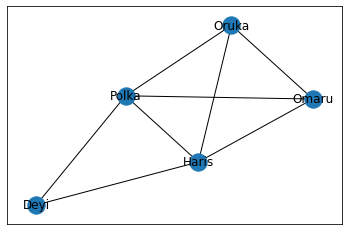

In [ ]:
nx.draw_networkx(G_symmetric)

##Asymmetric Networks

In [ ]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

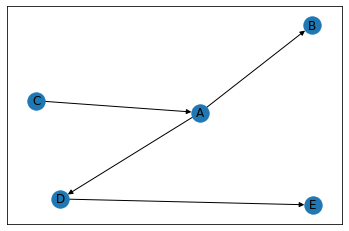

In [ ]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

##Weighted Networks

{('Haris', 'Omaru'): Text(-0.2587309776409397, -0.02984482722461209, '25'),
 ('Haris', 'Polka'): Text(0.007870522416482326, 0.14436169992375983, '8'),
 ('Haris', 'Oruka'): Text(-0.37914037708876014, -0.29859881282363276, '11'),
 ('Haris', 'Deyi'): Text(0.43499958384339116, -0.04185383401071744, '1'),
 ('Omaru', 'Polka'): Text(-0.1208596229112398, 0.26514072212261597, '4'),
 ('Omaru', 'Oruka'): Text(-0.5078705224164823, -0.17781979062477665, '7'),
 ('Omaru', 'Deyi'): Text(0.306269438515669, 0.0789251881881387, '1'),
 ('Polka', 'Deyi'): Text(0.572870938573091, 0.25313171533651063, '1')}

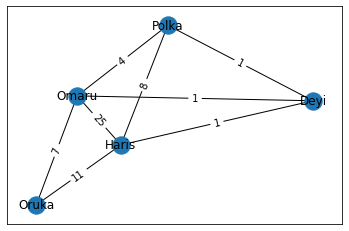

In [ ]:
G_weighted = nx.Graph()
G_weighted.add_edge('Haris','Omaru', weight=25)
G_weighted.add_edge('Haris','Polka', weight=8)
G_weighted.add_edge('Haris','Oruka', weight=11)
G_weighted.add_edge('Haris','Deyi', weight=1)
G_weighted.add_edge('Omaru','Polka', weight=4)
G_weighted.add_edge('Omaru','Oruka',weight=7)
G_weighted.add_edge('Omaru','Deyi', weight=1)
G_weighted.add_edge('Deyi','Polka',weight=1)
pos=nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted,pos)
labels = nx.get_edge_attributes(G_weighted,'weight')
nx.draw_networkx_edge_labels(G_weighted,pos,edge_labels=labels)

##Multigraph

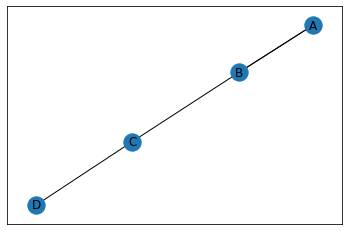

In [ ]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')
nx.spring_layout(G)
nx.draw_networkx(G)

In [ ]:
G.edges()
# MultiEdgeDataView([('A', 'B', {'relation': 'neighbor'}), ('A', 'B', {'relation': 'friend'}), ('B', 'C', {'relation': 'neighbor'}), ('B', 'D', {'relation': 'neighbor'}), ('C', 'D', {'relation': 'friend'})])


MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D')])

In [ ]:
nx.degree(G_symmetric, 'Deyi')

2

In [ ]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [ ]:
nx.shortest_path(G_symmetric, 'Deyi', 'Oruka')

['Deyi', 'Haris', 'Oruka']

#Implementasi SNA pada data Aktor Marvel Universe

## Import Library

In [21]:
import pandas as pd  # data wrangling
%pip install pyvis
from pyvis.network import Network  # drawing graph 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read CSV/Data Aktor

In [22]:
!gdown --id '1HpNhXe9KpvXYEmrdXOOXP1V96kaFvbQA' -O data.csv


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HpNhXe9KpvXYEmrdXOOXP1V96kaFvbQA
To: /content/data.csv
100% 172k/172k [00:00<00:00, 59.0MB/s]


In [23]:
df = pd.read_csv('data.csv')  # read in data 
df = pd.merge(df, df, 'inner', on='FilmID')  # join data dengan dirinya sendiri untuk mendapatkan
                                           #table Semua actor terkoneksi satu dengan yang lain 
df

,Unnamed: 0_x,index_x,Actor_x,ActorID_x,Film_x,Year_x,Votes_x,Rating_x,FilmID,in_endgame_x,Unnamed: 0_y,index_y,Actor_y,ActorID_y,Film_y,Year_y,Votes_y,Rating_y,in_endgame_y
0,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,tt4154796,1,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,1
1,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,tt4154796,1,49,7108,Samuel L. Jackson,nm0000168,Avengers: Endgame,2019,849079,8.4,1
2,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,tt4154796,1,177,8634,Michelle Pfeiffer,nm0000201,Avengers: Endgame,2019,849079,8.4,1
3,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,tt4154796,1,225,8731,Natalie Portman,nm0000204,Avengers: Endgame,2019,849079,8.4,1
4,0,5695,Michael Douglas,nm0000140,Avengers: Endgame,2019,849079,8.4,tt4154796,1,271,12143,Angela Bassett,nm0000291,Avengers: Endgame,2019,849079,8.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,2168,191727,Jacob Batalon,nm8188622,Every Day,2018,18902,6.4,tt7026672,1,2168,191727,Jacob Batalon,nm8188622,Every Day,2018,18902,6.4,1
10065,2169,191728,Jacob Batalon,nm8188622,Blood Fest,2018,4706,5.4,tt7208564,1,2169,191728,Jacob Batalon,nm8188622,Blood Fest,2018,4706,5.4,1
10066,2170,191729,Jacob Batalon,nm8188622,Banana Split,2018,2486,6.2,tt7755856,1,2170,191729,Jacob Batalon,nm8188622,Banana Split,2018,2486,6.2,1
10067,2172,191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254,1,2172,191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,1


## Pre-Proccess Table

In [24]:
# drop koneksi duplikat(Aktor terkoneksi dengan dirinya sendiri)
df['duplicate'] = df.apply(lambda row: 1 if row['ActorID_y'] == row['ActorID_x'] else 0, axis=1)  
df = df[df['duplicate'] == 0][['Actor_x', 'Actor_y', 'Film_x', 'Rating_x']] 

# drop Endgame and Inifity War untuk menghindari crowding network edges
df = df[df['Film_x'] != 'Avengers: Endgame']
df = df[df['Film_x'] != 'Avengers: Infinity War']

# rename columns
df= df.rename(columns={
    'Rating_x': 'Rating',
    'Film_x': 'Film'
})

In [25]:
df

,Actor_x,Actor_y,Film,Rating
4625,Michael Douglas,Michelle Pfeiffer,Ant-Man and the Wasp,7.0
4626,Michael Douglas,Stan Lee,Ant-Man and the Wasp,7.0
4627,Michael Douglas,Paul Rudd,Ant-Man and the Wasp,7.0
4628,Michael Douglas,Evangeline Lilly,Ant-Man and the Wasp,7.0
4629,Michelle Pfeiffer,Michael Douglas,Ant-Man and the Wasp,7.0
...,...,...,...,...
9851,Tom Holland,Benedict Cumberbatch,The Current War,6.5
9929,Sebastian Stan,Tom Holland,The Devil All the Time,7.1
9930,Tom Holland,Sebastian Stan,The Devil All the Time,7.1
9991,Karen Gillan,Tom Holland,Spies in Disguise,6.8


## Membuat Nodes

In [26]:
# add features untuk dimensions node pada library pyvis
group_x = df.groupby(["Actor_x"]).count().reset_index()
group_y = df.groupby(["Actor_y"]).mean().reset_index()
test = pd.Series(group_x["Film"], name="appearances_x")
group_y = pd.concat([group_y, test], axis=1)

In [27]:
group_x

,Actor_x,Actor_y,Film,Rating
0,Angela Bassett,11,11,11
1,Anthony Mackie,71,71,71
2,Benedict Cumberbatch,27,27,27
3,Benedict Wong,15,15,15
4,Bradley Cooper,25,25,25
...,...,...,...,...
59,Vin Diesel,19,19,19
60,William Hurt,23,23,23
61,Winston Duke,7,7,7
62,Yvette Nicole Brown,6,6,6


In [28]:
group_y

,Actor_y,Rating,appearances_x
0,Angela Bassett,6.618182,11
1,Anthony Mackie,7.243662,71
2,Benedict Cumberbatch,7.303704,27
3,Benedict Wong,7.053333,15
4,Bradley Cooper,7.320000,25
...,...,...,...
59,Vin Diesel,7.489474,19
60,William Hurt,7.508696,23
61,Winston Duke,7.314286,7
62,Yvette Nicole Brown,6.350000,6


In [29]:
# build node store 
nodes = group_x['Actor_x'].tolist()

for y in group_y['Actor_y'].tolist():
    if y not in nodes:
        nodes.append(y) # Menghindari aktor duplikat
        
nodes[:5]

['Angela Bassett',
 'Anthony Mackie',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Bradley Cooper']

In [30]:
# Indexing Setiap Node (Python Dictionary)
nodes = [{"Actor": n} for n in nodes]
i = 1
for n in nodes:
    n.update({"Index": i})
    i += 1

In [31]:
# convert to df and add measure fields select only the fields needed
node_store = pd.DataFrame(nodes)
node_store = node_store.merge(group_x, how="left", left_on="Actor", right_on="Actor_x")
node_store = node_store.merge(group_y, how="left", left_on="Actor", right_on="Actor_y")
node_store = node_store[["Actor", "Index", "Rating_y", "appearances_x"]]
display(node_store)

,Actor,Index,Rating_y,appearances_x
0,Angela Bassett,1,6.618182,11
1,Anthony Mackie,2,7.243662,71
2,Benedict Cumberbatch,3,7.303704,27
3,Benedict Wong,4,7.053333,15
4,Bradley Cooper,5,7.320000,25
...,...,...,...,...
59,Vin Diesel,60,7.489474,19
60,William Hurt,61,7.508696,23
61,Winston Duke,62,7.314286,7
62,Yvette Nicole Brown,63,6.350000,6


In [32]:
def rating_grouper(rat: float) -> str:
    """
    Function untuk convert avg rating ke hex code warna boundary orange 
    """
    if rat > 7.5:
        return '#FF6200'
    elif rat < 7.6 and rat > 5.0:
        return '#FD9346'
    else:
        return '#FDB777'

# apply lambda untuk convert color
node_store['color'] = node_store.apply(lambda row: rating_grouper(row['Rating_y']), axis=1) 

net = Network(notebook=True, bgcolor='#3A3B3C', font_color='white') # set up Network dengan font color white dan gray background 


# add nodes ke network dengan cara looping data frame nodes yang sudah dibuat sebelumnya
for n in range(0, len(node_store['Actor'])):
    net.add_node(node_store['Actor'][n], # node id menggunakan nama aktornya 
                 label=node_store['Actor'][n], # label  juga actor name 
                 value=node_store['appearances_x'][n] - min(node_store['appearances_x'])/max(node_store['appearances_x']- min(node_store['appearances_x'])), # skala min max ukuran sizes karena semua nodes butuh ukuran
                color = node_store['color'][n]) # set color to be hex color from df 

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [33]:
node_store

,Actor,Index,Rating_y,appearances_x,color
0,Angela Bassett,1,6.618182,11,#FD9346
1,Anthony Mackie,2,7.243662,71,#FD9346
2,Benedict Cumberbatch,3,7.303704,27,#FD9346
3,Benedict Wong,4,7.053333,15,#FD9346
4,Bradley Cooper,5,7.320000,25,#FD9346
...,...,...,...,...,...
59,Vin Diesel,60,7.489474,19,#FD9346
60,William Hurt,61,7.508696,23,#FF6200
61,Winston Duke,62,7.314286,7,#FD9346
62,Yvette Nicole Brown,63,6.350000,6,#FD9346


## Membuat Edges

In [34]:
# zip semua aktor menjadi relationships 
all_edges = list(zip(df['Actor_x'].tolist(), df['Actor_y'].tolist(), df['Film'].tolist()))

# edge sample awal untuk membantu proses loop
edges = [['Michael Douglas', 'Michelle Pfeiffer', 'Ant-Man and the Wasp']]

# hanya append edge yang unique ke edges 'edges'
# jika tidak dibeginikan,nanti akan ada edges duplikat (Actor_X, Actor_Y) dan (Actor_Y, Actor_X)
for e in all_edges:
    if list(e) in edges or [e[1], e[0], e[2]] in edges:
        pass
    else:
        edges.append(list(e))

edges = [{"Actor_x": e[0], "Actor_y": e[1], "Film": e[2]} for e in edges]
edges[:5]

[{'Actor_x': 'Michael Douglas',
  'Actor_y': 'Michelle Pfeiffer',
  'Film': 'Ant-Man and the Wasp'},
 {'Actor_x': 'Michael Douglas',
  'Actor_y': 'Stan Lee',
  'Film': 'Ant-Man and the Wasp'},
 {'Actor_x': 'Michael Douglas',
  'Actor_y': 'Paul Rudd',
  'Film': 'Ant-Man and the Wasp'},
 {'Actor_x': 'Michael Douglas',
  'Actor_y': 'Evangeline Lilly',
  'Film': 'Ant-Man and the Wasp'},
 {'Actor_x': 'Michelle Pfeiffer',
  'Actor_y': 'Stan Lee',
  'Film': 'Ant-Man and the Wasp'}]

In [35]:
# convert edge store kedalam dataframe dan merge beserta fiturnya
edge_store = pd.DataFrame(edges)
edge_store = edge_store.groupby(['Actor_x', 'Actor_y']).count().reset_index()
av_ratings = df.groupby(['Actor_x', 'Actor_y']).mean().reset_index()

edge_store = edge_store.merge(av_ratings, how='left', left_on=['Actor_x', 'Actor_y'], right_on=['Actor_x', 'Actor_y'])
edge_store = edge_store[['Actor_x', 'Actor_y', 'Rating', 'Film']]

edge_store = edge_store.merge(node_store, how='inner', left_on='Actor_x', right_on='Actor')
edge_store = edge_store[['Actor_x', 'Actor_y', 'Rating', 'Film', 'Index']]

edge_store = edge_store.merge(node_store, how='inner', left_on='Actor_y', right_on='Actor')
edge_store = edge_store[['Actor_x', 'Actor_y', 'Rating', 'Film', 'Index_x', 'Index_y']]
edge_store

,Actor_x,Actor_y,Rating,Film,Index_x,Index_y
0,Angela Bassett,Anthony Mackie,6.700000,1,1,2
1,Callan Mulvey,Anthony Mackie,7.700000,1,7,2
2,Chris Evans,Anthony Mackie,7.033333,6,10,2
3,Chris Pratt,Anthony Mackie,6.100000,2,12,2
4,Don Cheadle,Anthony Mackie,7.550000,2,16,2
...,...,...,...,...,...,...
566,Natalie Portman,Rene Russo,6.950000,2,40,44
567,Samuel L. Jackson,Rene Russo,7.000000,1,48,44
568,Robert Redford,Patrick Gorman,7.400000,1,46,41
569,Samuel L. Jackson,Angela Bassett,5.600000,2,48,1


In [36]:
# apply kembali lambda untuk edge ratings
edge_store['color'] = edge_store.apply(lambda row: rating_grouper(row['Rating']), axis=1)

# add edges ke dalam network
for e in range(0, len(edge_store['Actor_x'])):
    net.add_edge(edge_store['Actor_x'][e], # actor to draw from 
                 edge_store['Actor_y'][e], # actor to draw to 
                 value=edge_store['Film'][e] - min(edge_store['Film'])/max(edge_store['Film']- min(edge_store['Film'])), # min max scale edges so all have weights
                color = edge_store['color'][e]) # add hex code color 

## Menerapkan Social Network

In [37]:
net.toggle_physics(
    True
)  # changes the physics option in network (edges spring back and network spins or moves when nodes are dragged)
net.force_atlas_2based()  # changes network layout based on force atlas algorithm
net.show("net.html")  # shows the network and saves as .html file

In [38]:
# df.where(['Actor_x']=='Patrick Gorman').dropna(axis = 0, how = 'all')

df

,Actor_x,Actor_y,Film,Rating
4625,Michael Douglas,Michelle Pfeiffer,Ant-Man and the Wasp,7.0
4626,Michael Douglas,Stan Lee,Ant-Man and the Wasp,7.0
4627,Michael Douglas,Paul Rudd,Ant-Man and the Wasp,7.0
4628,Michael Douglas,Evangeline Lilly,Ant-Man and the Wasp,7.0
4629,Michelle Pfeiffer,Michael Douglas,Ant-Man and the Wasp,7.0
...,...,...,...,...
9851,Tom Holland,Benedict Cumberbatch,The Current War,6.5
9929,Sebastian Stan,Tom Holland,The Devil All the Time,7.1
9930,Tom Holland,Sebastian Stan,The Devil All the Time,7.1
9991,Karen Gillan,Tom Holland,Spies in Disguise,6.8


In [39]:
df.where(df['Actor_x']=='Patrick Gorman').dropna(axis = 0, how = 'all')

,Actor_x,Actor_y,Film,Rating
8241,Patrick Gorman,Robert Redford,Three Days of the Condor,7.4
